In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from matplotlib.ticker import MaxNLocator

In [8]:
ROOT_FOLDER = os.path.dirname(os.getcwd())
PROCESSED_DATA =  os.path.join(ROOT_FOLDER, "data","processed")
COLUMN_INFO = os.path.join(PROCESSED_DATA,"chartevents_column_dict_20240512.pkl")
ICU_STAYS = os.path.join(PROCESSED_DATA,"icustays_20240512.feather")
ICU_CHART_EVENTS = os.path.join(PROCESSED_DATA, "icu_chartevents_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_CHART_TABS = os.path.join(PROCESSED_DATA,"icu_chartevents_tabular_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_CHART_TIMESERIES = os.path.join(PROCESSED_DATA,"icu_chartevents_timeseries_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_LAB_EVENTS = os.path.join(PROCESSED_DATA, "icu_labevents_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_OUTPUT_EVENTS = os.path.join(PROCESSED_DATA,"icu_outputevents_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_TAB_FEATURES = os.path.join(PROCESSED_DATA,"icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_TIMESERIES_FEATURES = os.path.join(PROCESSED_DATA,"icu_timeseries_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")
ICU_TIMESERIES_LABEVENTS = os.path.join(PROCESSED_DATA, "icu_timeseries_labevents_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather")

icu_stays_df = pd.read_feather(ICU_STAYS)
icu_chart_events_df = pd.read_feather(ICU_CHART_EVENTS)
icu_chart_tabs_df = pd.read_feather(ICU_CHART_TABS)
icu_chart_timeseries_df = pd.read_feather(ICU_CHART_TIMESERIES)
icu_lab_events_df = pd.read_feather(ICU_LAB_EVENTS)
icu_output_events_df = pd.read_feather(ICU_OUTPUT_EVENTS)
icu_tab_features_df = pd.read_feather(ICU_TAB_FEATURES)
icu_timeseries_features_df = pd.read_feather(ICU_TIMESERIES_FEATURES)
icu_timeseries_labevents_df = pd.read_feather(ICU_TIMESERIES_LABEVENTS)                         

Find columns containing oxygen

In [78]:
oxygen_columns = [col for col in icu_timeseries_features_df if 'oxygen' in col.lower()]
oxygen_df = icu_timeseries_features_df[oxygen_columns]
oxygen_df

,Oxygen Saturation
0,NaN
1,NaN
2,93.0
3,93.0
4,93.0
...,...
2911,NaN
2912,NaN
2913,NaN
2914,NaN


Merge columns and create oxygen dataframe

In [86]:
df1 = icu_timeseries_features_df[['stay_id', 'Oxygen Saturation', 'abs_event_time']]
df2 = icu_tab_features_df[['stay_id', 'subject_id']]
oxygen = pd.merge(df1, df2, on='stay_id')
oxygen['abs_event_time'] = pd.to_datetime(oxygen['abs_event_time'])
oxygen

,stay_id,Oxygen Saturation,abs_event_time,subject_id
0,30057454,NaN,1970-01-01 01:00:00,10023117
1,30057454,NaN,1970-01-01 02:00:00,10023117
2,30057454,93.0,1970-01-01 03:00:00,10023117
3,30057454,93.0,1970-01-01 04:00:00,10023117
4,30057454,93.0,1970-01-01 05:00:00,10023117
...,...,...,...,...
2911,39880770,NaN,1970-01-01 20:00:00,10010867
2912,39880770,NaN,1970-01-01 21:00:00,10010867
2913,39880770,NaN,1970-01-01 22:00:00,10010867
2914,39880770,NaN,1970-01-01 23:00:00,10010867


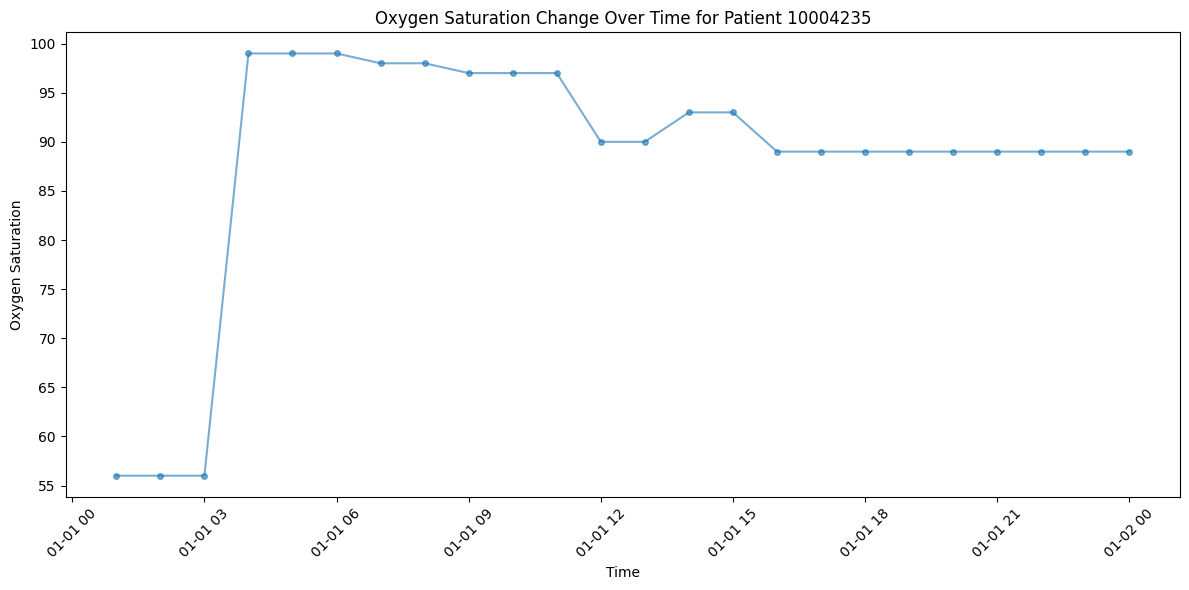

In [97]:
random_patient_id = np.random.choice(oxygen['subject_id'].unique())

patient_data = oxygen[oxygen['subject_id'] == random_patient_id]

patient_data = patient_data.sort_values(by='abs_event_time')

plt.figure(figsize=(12, 6))
plt.plot(patient_data['abs_event_time'], patient_data['Oxygen Saturation'], 
         marker='o', linestyle='-', markersize=4, alpha=0.6)
plt.title(f'Oxygen Saturation Change Over Time for Patient {random_patient_id}')
plt.xlabel('Time')
plt.ylabel('Oxygen Saturation')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()